In [58]:
# Principal Component Regression (PCR)
#  Principal Component Regression (PCR) is a statistical technique for regression analysis that is used to reduce 
#     the dimensionality of a dataset by projecting it onto a lower-dimensional subspace. 

In [59]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np


data = pd.read_csv("C:/Users/Derya/Downloads/Team_Basketball.csv")
df = data.copy()
df = df.dropna()

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [62]:
dms = pd.get_dummies(df[['League','Division','NewLeague']])

In [63]:
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [64]:
y = df["Salary"]

In [65]:
X = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float")

In [66]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [67]:
x_ = pd.concat([X, dms[["League_N","Division_W","NewLeague_N"]]], axis=1)
x_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [68]:
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
X_Train, X_Test,Y_Train,Y_Test = train_test_split(X,y, test_size=0.25, random_state=42)

In [69]:
print("X_Train:", X_Train.shape)
print("X_Test:", X_Test.shape)
print("Y_Train:", Y_Train.shape)
print("Y_Test:", Y_Test.shape)
training = df.copy()

X_Train: (197, 16)
X_Test: (66, 16)
Y_Train: (197,)
Y_Test: (66,)


In [70]:
print("training", training.shape)

training (263, 20)


In [71]:
from sklearn.decomposition import PCA              # Principal Component Analysis
from sklearn.preprocessing import scale

pca = PCA()

In [72]:
X_reduced_train = pca.fit_transform(scale(X_Train))

In [73]:
X_reduced_train[:3,1:4]

array([[-0.45961369, -0.56660666, -0.41453994],
       [-0.85298704,  2.99712318, -0.29472596],
       [-1.58615544, -1.28290233, -0.50658429]])

In [74]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[:10]

array([45.3 , 70.79, 81.63, 86.97, 91.4 , 94.73, 96.49, 97.61, 98.42,
       99.03])

In [75]:
lm = LinearRegression()

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
pcr_model = lm.fit(X_reduced_train,Y_Train)

In [77]:
y_predict = pcr_model.predict(X_reduced_train)


In [78]:
np.sqrt(mean_squared_error(Y_Train, y_predict))

295.54044421756936

In [79]:
from sklearn import model_selection

In [80]:
cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

In [81]:
lm = LinearRegression()
RMSE = []

In [84]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm, X_reduced_train[:,:i], 
                                                       Y_Train.ravel(),
                                                       cv=10,
                                                       scoring="neg_mean_squared_error"))
    RMSE.append(score)

Text(0.5, 1.0, 'PCM Model Tuning for Salary Prediction Model')

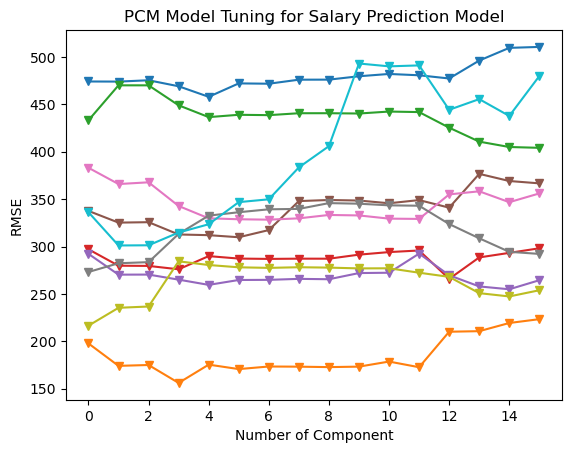

In [89]:
plt.plot(RMSE,"-v")
plt.xlabel("Number of Component")
plt.ylabel("RMSE")
plt.title("PCM Model Tuning for Salary Prediction Model")

In [90]:
pcr_model = lm.fit(X_reduced_train[:,:10],Y_Train)

In [91]:
y_pred = pcr_model.predict(X_reduced_train[:,:10])

In [92]:
np.sqrt(mean_squared_error(Y_Train,y_pred))

312.03762427411147